Council District perimeters have changed steadily since 1972. Every 10 years, these districts are revised with new boundaries drawn throughout the county. This analysis looks at this historic dataset and seeks to create maps for understanding these changes over time. Below, a table of contents outlines the chapters and contents of this lab notebook. 

## Table of Contents

### Chapter 1: Exploratory Data Analysis and Wrangling 
This Chapter seeks to import data into the notebook and begin initial exploration of its contents. Datatypes will be assessed and a 'year' column will be added to identify the year of the boundary line. All datasets will then be merged into one, creating the 'district_merge3' variable. 

1.1 - Historic Districts 3 for October 11

1.2 - District 3 Census Data 2020 

1.3 - Historic District 10 for October 11

1.4 - District 10 Census Data 2020

### Chapter 2: Geoprocessing and Analysis 
This chapter is about processing the data to answer questions based on various attributes. District Boundaries will be assessed to find intersections or overlaps of previous district lines. 

2.1 - Districts 3 & 10 for October 11 

2.2 - Districts 4 & 9 for *********

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# set max columns display for geopandas
pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows', 10)

# adding the plt parameters for charting size 
plt.rcParams['figure.figsize'] = (16, 12)

## Chapter 1: Exploratory Data Analysis and Wrangling
### 1.1 - Historic District 3 for October 11

In [4]:
# import data 
councilDistrict1972 = gpd.read_file('data/Council_District_1972-shp.zip')
councilDistrict1982 = gpd.read_file('data/Council_District_1982-shp.zip')
councilDistrict1992 = gpd.read_file('data/Council_District_1992-shp.zip')
councilDistrict2002 = gpd.read_file('data/Council_District_2002-shp.zip')
councilDistrict2012 = gpd.read_file('data/Council_District_2012-shp.zip')

In [5]:
councilDistrict1972.head(11)

,OBJECTID,AREA,PERIMETER,DIST1972_,DIST1972_I,DISTRICT,REP,Shape__Are,Shape__Len,geometry
0,1,6.606818e+09,683972.989305,2,0,12,None,6.606818e+09,683972.987175,"POLYGON ((-84.45326 38.09343, -84.46219 38.097..."
1,2,1.065124e+08,54629.101883,3,0,6,None,1.065124e+08,54629.101098,"POLYGON ((-84.45326 38.09343, -84.45045 38.092..."
2,3,8.660226e+07,51318.615574,4,0,2,None,8.660226e+07,51318.615691,"POLYGON ((-84.50918 38.08240, -84.50974 38.083..."
3,4,1.177660e+08,58358.246684,5,0,11,None,1.177660e+08,58358.246199,"POLYGON ((-84.51811 38.06203, -84.52059 38.063..."
4,5,3.971363e+07,30875.792156,6,0,1,None,3.971363e+07,30875.791989,"POLYGON ((-84.47224 38.06378, -84.47017 38.065..."
...,...,...,...,...,...,...,...,...,...,...
6,7,1.293373e+08,75631.999628,8,0,7,None,1.293373e+08,75631.998975,"POLYGON ((-84.46620 38.05962, -84.46488 38.060..."
7,8,8.831988e+07,49863.304053,9,0,10,None,8.831988e+07,49863.303974,"POLYGON ((-84.55211 38.04677, -84.55192 38.046..."
8,9,5.614430e+07,32974.271275,10,0,5,None,5.614430e+07,32974.271390,"POLYGON ((-84.48176 38.04245, -84.48152 38.042..."
9,10,7.511896e+07,57327.734099,11,12,4,None,7.511896e+07,57327.733585,"POLYGON ((-84.49459 38.04144, -84.49454 38.041..."


In [6]:
#check datatypes 
councilDistrict1972.dtypes

OBJECTID         int64
AREA           float64
PERIMETER      float64
DIST1972_        int64
DIST1972_I       int64
DISTRICT         int64
REP             object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object

In [7]:
# add year of district 
councilDistrict1972['year'] = "1972"

In [8]:
councilDistrict1972.head()

,OBJECTID,AREA,PERIMETER,DIST1972_,DIST1972_I,DISTRICT,REP,Shape__Are,Shape__Len,geometry,year
0,1,6.606818e+09,683972.989305,2,0,12,None,6.606818e+09,683972.987175,"POLYGON ((-84.45326 38.09343, -84.46219 38.097...",1972
1,2,1.065124e+08,54629.101883,3,0,6,None,1.065124e+08,54629.101098,"POLYGON ((-84.45326 38.09343, -84.45045 38.092...",1972
2,3,8.660226e+07,51318.615574,4,0,2,None,8.660226e+07,51318.615691,"POLYGON ((-84.50918 38.08240, -84.50974 38.083...",1972
3,4,1.177660e+08,58358.246684,5,0,11,None,1.177660e+08,58358.246199,"POLYGON ((-84.51811 38.06203, -84.52059 38.063...",1972
4,5,3.971363e+07,30875.792156,6,0,1,None,3.971363e+07,30875.791989,"POLYGON ((-84.47224 38.06378, -84.47017 38.065...",1972


In [9]:
councilDistrict1982.head(11)

,OBJECTID,AREA,PERIMETER,DIST1982_,DIST1982_I,DISTRICT,REP,URL,TELEPHONE,EMAIL,Shape__Are,Shape__Len,geometry
0,1,6.547747e+09,711052.303668,2,1,12,GLORIA MARTIN,http://www.lfucg.com/d12.htm,(606) 258-3200,gloriam@lfucg.com,6.547747e+09,711052.302245,"POLYGON ((-84.45326 38.09343, -84.46219 38.097..."
1,2,1.325028e+08,73629.476039,3,2,2,JACQUES WIGGINTON,http://www.lfucg.com/d2.htm,(606) 258-3200,jwiggingt@lfucg.com,1.325028e+08,73629.476355,"POLYGON ((-84.46647 38.08873, -84.46652 38.088..."
2,3,1.218511e+08,68006.195086,4,3,6,AL MITCHELL,http://www.lfucg.com/d6.htm,(606) 258-3200,albertm2@lfucg.com,1.218511e+08,68006.195306,"POLYGON ((-84.45326 38.09343, -84.45045 38.092..."
3,4,1.331180e+08,64867.498924,5,4,11,RICHARD MOLONEY,http://www.lfucg.com/d11.htm,(606) 258-3200,richardm@lfucg.com,1.331180e+08,64867.500290,"POLYGON ((-84.51836 38.07489, -84.51819 38.073..."
4,5,5.698344e+07,42719.386907,6,5,1,GEORGE BROWN,http://www.lfucg.com/d1.htm,(606) 258-3200,georgeb@lfucg.com,5.698344e+07,42719.386589,"POLYGON ((-84.48232 38.06564, -84.48171 38.064..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,7,1.600521e+08,105715.361730,8,9,7,WILLY FOGLE,http://www.lfucg.com/d7.htm,(606) 258-3200,willyf@lfucg.com,1.600521e+08,105715.362465,"POLYGON ((-84.45423 38.04284, -84.45413 38.044..."
7,8,1.230123e+08,57795.831829,9,7,10,SANDY SHAFER,http://www.lfucg.com/d10.htm,(606) 258-3200,sandys@lfucg.com,1.230123e+08,57795.832617,"POLYGON ((-84.56718 38.03523, -84.56739 38.035..."
8,9,1.115583e+08,54715.341326,10,8,5,"BILL FARMER, JR.",http://www.lfucg.com/d5.htm,(606) 258-3200,billf@lfucg.com,1.115583e+08,54715.341322,"POLYGON ((-84.48612 38.04189, -84.48496 38.042..."
9,10,1.249425e+08,56040.970453,11,13,4,LINDA GORTON,http://www.lfucg.com/d4.htm,(606) 258-3200,lgorton@lfucg.com,1.249425e+08,56040.969447,"POLYGON ((-84.52123 38.03166, -84.51990 38.030..."


In [10]:
#check datatypes 
councilDistrict1982.dtypes

OBJECTID         int64
AREA           float64
PERIMETER      float64
DIST1982_        int64
DIST1982_I       int64
                ...   
TELEPHONE       object
EMAIL           object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
Length: 13, dtype: object

In [11]:
# add year of district 
councilDistrict1982['year'] = "1982"

In [12]:
councilDistrict1992.head(11)

,OBJECTID,AREA,PERIMETER,DIST1992_,DIST1992_I,DISTRICT,REP,URL,TELEPHONE,EMAIL,Shape__Are,Shape__Len,geometry
0,1,1.394535e+08,67804.288645,2,4,11,RICHARD MOLONEY,http://www.lfucg.com/d11.htm,(606) 258-3200,richardm@lfucg.com,1.394535e+08,67804.290903,"POLYGON ((-84.51636 38.05003, -84.51634 38.049..."
1,2,9.496719e+07,54684.493323,3,6,3,DICK DeCAMP,http://www.lfucg.com/d3.htm,(606) 258-3200,dickd@lfucg.com,9.496719e+07,54684.492292,"POLYGON ((-84.51636 38.05003, -84.51623 38.050..."
2,3,6.103075e+09,739921.870762,4,1,12,GLORIA MARTIN,http://www.lfucg.com/d12.htm,(606) 258-3200,gloriam@lfucg.com,6.103075e+09,739921.868077,"POLYGON ((-84.44734 38.09430, -84.44745 38.094..."
3,4,4.075670e+08,138284.312074,5,2,2,JACQUES WIGGINTON,http://www.lfucg.com/d2.htm,(606) 258-3200,jwiggingt@lfucg.com,4.075670e+08,138284.311526,"POLYGON ((-84.45859 38.07955, -84.45647 38.076..."
4,5,1.935929e+08,120052.316712,6,3,6,AL MITCHELL,http://www.lfucg.com/d6.htm,(606) 258-3200,albertm2@lfucg.com,1.935929e+08,120052.316620,"POLYGON ((-84.44734 38.09430, -84.44731 38.094..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,7,1.956126e+08,84427.649569,8,7,10,SANDY SHAFER,http://www.lfucg.com/d10.htm,(606) 258-3200,sandys@lfucg.com,1.956126e+08,84427.650399,"POLYGON ((-84.51919 38.02386, -84.52018 38.021..."
7,8,1.296537e+08,54747.487005,9,8,5,"BILL FARMER, JR.",http://www.lfucg.com/d5.htm,(606) 258-3200,billf@lfucg.com,1.296537e+08,54747.486733,"POLYGON ((-84.47986 38.04142, -84.47677 38.039..."
8,9,1.696978e+08,89054.914472,10,9,7,WILLY FOGLE,http://www.lfucg.com/d7.htm,(606) 258-3200,willyf@lfucg.com,1.696978e+08,89054.912494,"POLYGON ((-84.45256 38.02923, -84.45247 38.029..."
9,10,1.126018e+08,59041.324064,11,13,4,LINDA GORTON,http://www.lfucg.com/d4.htm,(606) 258-3200,lgorton@lfucg.com,1.126018e+08,59041.322757,"POLYGON ((-84.52077 38.02055, -84.52050 38.020..."


In [13]:
#check datatypes 
councilDistrict1992.dtypes

OBJECTID         int64
AREA           float64
PERIMETER      float64
DIST1992_        int64
DIST1992_I       int64
                ...   
TELEPHONE       object
EMAIL           object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
Length: 13, dtype: object

In [14]:
# add year of district 
councilDistrict1992['year'] = "1992"

In [15]:
councilDistrict2002.head(11)

,OBJECTID,AREA,PERIMETER,DIST2002_,DIST2002_I,DISTRICT,REP,URL,TELEPHONE,EMAIL,Shape__Are,Shape__Len,geometry
0,1,5.820313e+09,751532.106118,2,1,12,GLORIA MARTIN,http://www.lfucg.com/Council/District12.asp,(859) 258-3200,gloriam@lfucg.com,5.820313e+09,751532.107777,"POLYGON ((-84.47775 38.09588, -84.47811 38.096..."
1,2,4.306799e+08,173325.693661,3,2,2,JACQUES WIGGINTON,http://www.lfucg.com/Council/District02.asp,(859) 258-3200,jwiggingt@lfucg.com,4.306799e+08,173325.693224,"POLYGON ((-84.47775 38.09588, -84.47594 38.094..."
2,3,2.809204e+08,124971.231113,4,3,6,AL MITCHELL,http://www.lfucg.com/Council/District06.asp,(859) 258-3200,albertm2@lfucg.com,2.809204e+08,124971.233188,"POLYGON ((-84.45045 38.09225, -84.45024 38.092..."
3,4,1.357880e+08,60432.687374,5,4,1,GEORGE BROWN,http://www.lfucg.com/Council/District01.asp,(859) 258-3200,georgeb@lfucg.com,1.357880e+08,60432.687004,"POLYGON ((-84.50595 38.07458, -84.50592 38.074..."
4,5,1.229700e+08,49593.356439,6,5,11,RICHARD MOLONEY,http://www.lfucg.com/Council/District11.asp,(859) 258-3200,richardm@lfucg.com,1.229700e+08,49593.356667,"POLYGON ((-84.54176 38.05791, -84.54138 38.057..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,7,1.709437e+08,59966.992203,8,7,5,"BILL FARMER, JR.",http://www.lfucg.com/Council/District05.asp,(859) 258-3200,billf@lfucg.com,1.709437e+08,59966.993000,"POLYGON ((-84.45451 38.03858, -84.45452 38.038..."
7,8,1.920664e+08,98960.197025,9,8,10,SANDY SHAFER,http://www.lfucg.com/Council/District10.asp,(859) 258-3200,sandys@lfucg.com,1.920664e+08,98960.196952,"POLYGON ((-84.56795 38.03703, -84.56757 38.037..."
8,9,2.649911e+08,96958.596360,10,9,7,WILLY FOGLE,http://www.lfucg.com/Council/District07.asp,(859) 258-3200,willyf@lfucg.com,2.649911e+08,96958.597131,"POLYGON ((-84.45061 38.02883, -84.44995 38.028..."
9,10,1.276469e+08,55572.271937,11,10,4,LINDA GORTON,http://www.lfucg.com/Council/District04.asp,(859) 258-3200,lgorton@lfucg.com,1.276469e+08,55572.272748,"POLYGON ((-84.49512 38.01330, -84.49515 38.012..."


In [16]:
councilDistrict2002.dtypes

OBJECTID         int64
AREA           float64
PERIMETER      float64
DIST2002_        int64
DIST2002_I       int64
                ...   
TELEPHONE       object
EMAIL           object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
Length: 13, dtype: object

In [17]:
councilDistrict2002['year'] = '2002'

In [18]:
councilDistrict2012.head()

,OBJECTID,DISTRICT,REP,URL,TELEPHONE,EMAIL,created_da,last_edite,created_by,last_edi_1,Shape__Are,Shape__Len,geometry
0,472,1,JAMES BROWN,https://www.lexingtonky.gov/council-district-1,(859) 280-8238,jbrown2@lexingtonky.gov,2021-01-18,2021-01-18,gis_lfucg,gis_lfucg,1.921685e+08,100620.876482,"POLYGON ((-84.45047 38.09221, -84.45145 38.091..."
1,473,2,JOSH MCCURN,https://www.lexingtonky.gov/council-district-2,(859) 280-8239,jmccurn@lexingtonky.gov,2021-01-18,2021-01-18,gis_lfucg,gis_lfucg,3.633366e+08,141609.398858,"POLYGON ((-84.47766 38.09583, -84.47766 38.095..."
2,474,3,HANNAH LEGRIS,https://www.lexingtonky.gov/council-district-3,(859) 280-8240,hlegris@lexingtonky.gov,2021-01-18,2021-01-18,gis_lfucg,gis_lfucg,1.134341e+08,67247.809381,"POLYGON ((-84.49785 38.05132, -84.49727 38.050..."
3,475,4,SUSAN LAMB,https://www.lexingtonky.gov/council-district-4,(859) 280-8241,susanl@lexingtonky.gov,2021-01-18,2021-01-18,gis_lfucg,gis_lfucg,1.481742e+08,71758.274651,"POLYGON ((-84.50602 38.01087, -84.50354 38.009..."
4,476,5,LIZ SHEEHAN,https://www.lexingtonky.gov/council-district-5,(859) 280-8242,lsheehan@lexingtonky.gov,2021-01-18,2021-01-18,gis_lfucg,gis_lfucg,2.025233e+08,77783.002668,"POLYGON ((-84.45617 38.05103, -84.45615 38.051..."


In [19]:
councilDistrict2012['year'] = '2012'

In [20]:
councilDistrict2012.head()

,OBJECTID,DISTRICT,REP,URL,TELEPHONE,EMAIL,created_da,last_edite,created_by,last_edi_1,Shape__Are,Shape__Len,geometry,year
0,472,1,JAMES BROWN,https://www.lexingtonky.gov/council-district-1,(859) 280-8238,jbrown2@lexingtonky.gov,2021-01-18,2021-01-18,gis_lfucg,gis_lfucg,1.921685e+08,100620.876482,"POLYGON ((-84.45047 38.09221, -84.45145 38.091...",2012
1,473,2,JOSH MCCURN,https://www.lexingtonky.gov/council-district-2,(859) 280-8239,jmccurn@lexingtonky.gov,2021-01-18,2021-01-18,gis_lfucg,gis_lfucg,3.633366e+08,141609.398858,"POLYGON ((-84.47766 38.09583, -84.47766 38.095...",2012
2,474,3,HANNAH LEGRIS,https://www.lexingtonky.gov/council-district-3,(859) 280-8240,hlegris@lexingtonky.gov,2021-01-18,2021-01-18,gis_lfucg,gis_lfucg,1.134341e+08,67247.809381,"POLYGON ((-84.49785 38.05132, -84.49727 38.050...",2012
3,475,4,SUSAN LAMB,https://www.lexingtonky.gov/council-district-4,(859) 280-8241,susanl@lexingtonky.gov,2021-01-18,2021-01-18,gis_lfucg,gis_lfucg,1.481742e+08,71758.274651,"POLYGON ((-84.50602 38.01087, -84.50354 38.009...",2012
4,476,5,LIZ SHEEHAN,https://www.lexingtonky.gov/council-district-5,(859) 280-8242,lsheehan@lexingtonky.gov,2021-01-18,2021-01-18,gis_lfucg,gis_lfucg,2.025233e+08,77783.002668,"POLYGON ((-84.45617 38.05103, -84.45615 38.051...",2012


<AxesSubplot:>

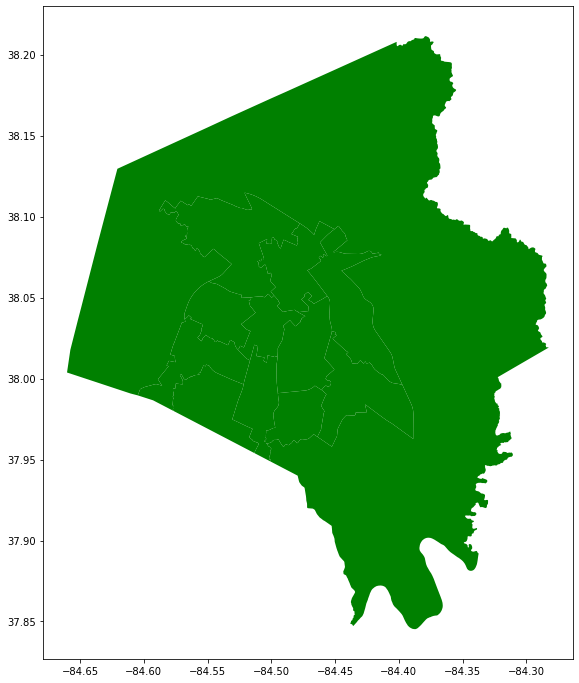

In [21]:
fig, ax = plt.subplots()


title = "Current District 3 Boundary Line (2012)"

councilDistrict2012.plot(ax=ax, color = 'green', linewidth=.2, zorder=0)

In [22]:
councilDistrict2012.to_file('data/clean_data/D3_current_boundary', driver = 'ESRI Shapefile')

In [23]:
# Appending GeoDataFrames

district_merge = councilDistrict1972.append(councilDistrict1982)

In [24]:
district_merge.head(100)

,OBJECTID,AREA,PERIMETER,DIST1972_,DIST1972_I,DISTRICT,REP,Shape__Are,Shape__Len,geometry,year,DIST1982_,DIST1982_I,URL,TELEPHONE,EMAIL
0,1,6.606818e+09,683972.989305,2.0,0.0,12,None,6.606818e+09,683972.987175,"POLYGON ((-84.45326 38.09343, -84.46219 38.097...",1972,NaN,NaN,NaN,NaN,NaN
1,2,1.065124e+08,54629.101883,3.0,0.0,6,None,1.065124e+08,54629.101098,"POLYGON ((-84.45326 38.09343, -84.45045 38.092...",1972,NaN,NaN,NaN,NaN,NaN
2,3,8.660226e+07,51318.615574,4.0,0.0,2,None,8.660226e+07,51318.615691,"POLYGON ((-84.50918 38.08240, -84.50974 38.083...",1972,NaN,NaN,NaN,NaN,NaN
3,4,1.177660e+08,58358.246684,5.0,0.0,11,None,1.177660e+08,58358.246199,"POLYGON ((-84.51811 38.06203, -84.52059 38.063...",1972,NaN,NaN,NaN,NaN,NaN
4,5,3.971363e+07,30875.792156,6.0,0.0,1,None,3.971363e+07,30875.791989,"POLYGON ((-84.47224 38.06378, -84.47017 38.065...",1972,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,8,1.230123e+08,57795.831829,NaN,NaN,10,SANDY SHAFER,1.230123e+08,57795.832617,"POLYGON ((-84.56718 38.03523, -84.56739 38.035...",1982,9.0,7.0,http://www.lfucg.com/d10.htm,(606) 258-3200,sandys@lfucg.com
8,9,1.115583e+08,54715.341326,NaN,NaN,5,"BILL FARMER, JR.",1.115583e+08,54715.341322,"POLYGON ((-84.48612 38.04189, -84.48496 38.042...",1982,10.0,8.0,http://www.lfucg.com/d5.htm,(606) 258-3200,billf@lfucg.com
9,10,1.249425e+08,56040.970453,NaN,NaN,4,LINDA GORTON,1.249425e+08,56040.969447,"POLYGON ((-84.52123 38.03166, -84.51990 38.030...",1982,11.0,13.0,http://www.lfucg.com/d4.htm,(606) 258-3200,lgorton@lfucg.com
10,11,1.957541e+08,77733.736029,NaN,NaN,9,JENNIFER MOSSOTTI,1.957541e+08,77733.735566,"POLYGON ((-84.55120 38.01548, -84.55041 38.012...",1982,12.0,11.0,http://www.lfucg.com/d9.htm,(606) 258-3200,jennifem@lfucg.com


In [25]:
district_merge1 = district_merge.append(councilDistrict1992)

In [26]:
district_merge1.head(100)

,OBJECTID,AREA,PERIMETER,DIST1972_,DIST1972_I,DISTRICT,REP,Shape__Are,Shape__Len,geometry,year,DIST1982_,DIST1982_I,URL,TELEPHONE,EMAIL,DIST1992_,DIST1992_I
0,1,6.606818e+09,683972.989305,2.0,0.0,12,None,6.606818e+09,683972.987175,"POLYGON ((-84.45326 38.09343, -84.46219 38.097...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1.065124e+08,54629.101883,3.0,0.0,6,None,1.065124e+08,54629.101098,"POLYGON ((-84.45326 38.09343, -84.45045 38.092...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,8.660226e+07,51318.615574,4.0,0.0,2,None,8.660226e+07,51318.615691,"POLYGON ((-84.50918 38.08240, -84.50974 38.083...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1.177660e+08,58358.246684,5.0,0.0,11,None,1.177660e+08,58358.246199,"POLYGON ((-84.51811 38.06203, -84.52059 38.063...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3.971363e+07,30875.792156,6.0,0.0,1,None,3.971363e+07,30875.791989,"POLYGON ((-84.47224 38.06378, -84.47017 38.065...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,8,1.296537e+08,54747.487005,NaN,NaN,5,"BILL FARMER, JR.",1.296537e+08,54747.486733,"POLYGON ((-84.47986 38.04142, -84.47677 38.039...",1992,NaN,NaN,http://www.lfucg.com/d5.htm,(606) 258-3200,billf@lfucg.com,9.0,8.0
8,9,1.696978e+08,89054.914472,NaN,NaN,7,WILLY FOGLE,1.696978e+08,89054.912494,"POLYGON ((-84.45256 38.02923, -84.45247 38.029...",1992,NaN,NaN,http://www.lfucg.com/d7.htm,(606) 258-3200,willyf@lfucg.com,10.0,9.0
9,10,1.126018e+08,59041.324064,NaN,NaN,4,LINDA GORTON,1.126018e+08,59041.322757,"POLYGON ((-84.52077 38.02055, -84.52050 38.020...",1992,NaN,NaN,http://www.lfucg.com/d4.htm,(606) 258-3200,lgorton@lfucg.com,11.0,13.0
10,11,2.427925e+08,71102.221028,NaN,NaN,9,JENNIFER MOSSOTTI,2.427925e+08,71102.221403,"POLYGON ((-84.52172 37.99641, -84.52174 37.996...",1992,NaN,NaN,http://www.lfucg.com/d9.htm,(606) 258-3200,jennifem@lfucg.com,12.0,11.0


In [27]:
district_merge2 = district_merge1.append(councilDistrict2002)

In [28]:
district_merge2.head(50)

,OBJECTID,AREA,PERIMETER,DIST1972_,DIST1972_I,DISTRICT,REP,Shape__Are,Shape__Len,geometry,year,DIST1982_,DIST1982_I,URL,TELEPHONE,EMAIL,DIST1992_,DIST1992_I,DIST2002_,DIST2002_I
0,1,6.606818e+09,683972.989305,2.0,0.0,12,None,6.606818e+09,683972.987175,"POLYGON ((-84.45326 38.09343, -84.46219 38.097...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1.065124e+08,54629.101883,3.0,0.0,6,None,1.065124e+08,54629.101098,"POLYGON ((-84.45326 38.09343, -84.45045 38.092...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,8.660226e+07,51318.615574,4.0,0.0,2,None,8.660226e+07,51318.615691,"POLYGON ((-84.50918 38.08240, -84.50974 38.083...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1.177660e+08,58358.246684,5.0,0.0,11,None,1.177660e+08,58358.246199,"POLYGON ((-84.51811 38.06203, -84.52059 38.063...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3.971363e+07,30875.792156,6.0,0.0,1,None,3.971363e+07,30875.791989,"POLYGON ((-84.47224 38.06378, -84.47017 38.065...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,8,1.920664e+08,98960.197025,NaN,NaN,10,SANDY SHAFER,1.920664e+08,98960.196952,"POLYGON ((-84.56795 38.03703, -84.56757 38.037...",2002,NaN,NaN,http://www.lfucg.com/Council/District10.asp,(859) 258-3200,sandys@lfucg.com,NaN,NaN,9.0,8.0
8,9,2.649911e+08,96958.596360,NaN,NaN,7,WILLY FOGLE,2.649911e+08,96958.597131,"POLYGON ((-84.45061 38.02883, -84.44995 38.028...",2002,NaN,NaN,http://www.lfucg.com/Council/District07.asp,(859) 258-3200,willyf@lfucg.com,NaN,NaN,10.0,9.0
9,10,1.276469e+08,55572.271937,NaN,NaN,4,LINDA GORTON,1.276469e+08,55572.272748,"POLYGON ((-84.49512 38.01330, -84.49515 38.012...",2002,NaN,NaN,http://www.lfucg.com/Council/District04.asp,(859) 258-3200,lgorton@lfucg.com,NaN,NaN,11.0,10.0
10,11,2.088896e+08,66462.505507,NaN,NaN,9,JENNIFER MOSSOTTI,2.088896e+08,66462.505485,"POLYGON ((-84.57780 37.98033, -84.57780 37.980...",2002,NaN,NaN,http://www.lfucg.com/Council/District09.asp,(859) 258-3200,jennifem@lfucg.com,NaN,NaN,12.0,11.0


In [29]:
district_merge3 = district_merge2.append(councilDistrict2012)

In [30]:
district_merge3.head(100)

,OBJECTID,AREA,PERIMETER,DIST1972_,DIST1972_I,DISTRICT,REP,Shape__Are,Shape__Len,geometry,year,DIST1982_,DIST1982_I,URL,TELEPHONE,EMAIL,DIST1992_,DIST1992_I,DIST2002_,DIST2002_I,created_da,last_edite,created_by,last_edi_1
0,1,6.606818e+09,683972.989305,2.0,0.0,12,None,6.606818e+09,683972.987175,"POLYGON ((-84.45326 38.09343, -84.46219 38.097...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1.065124e+08,54629.101883,3.0,0.0,6,None,1.065124e+08,54629.101098,"POLYGON ((-84.45326 38.09343, -84.45045 38.092...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,8.660226e+07,51318.615574,4.0,0.0,2,None,8.660226e+07,51318.615691,"POLYGON ((-84.50918 38.08240, -84.50974 38.083...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1.177660e+08,58358.246684,5.0,0.0,11,None,1.177660e+08,58358.246199,"POLYGON ((-84.51811 38.06203, -84.52059 38.063...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3.971363e+07,30875.792156,6.0,0.0,1,None,3.971363e+07,30875.791989,"POLYGON ((-84.47224 38.06378, -84.47017 38.065...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,479,NaN,NaN,NaN,NaN,9,WHITNEY ELLIOTT BAXTER,1.883201e+08,71062.353153,"POLYGON ((-84.54844 38.00772, -84.54821 38.007...",2012,NaN,NaN,https://www.lexingtonky.gov/council-district-9,(859) 280-8246,wbaxter@lexingtonky.gov,NaN,NaN,NaN,NaN,2021-01-18,2021-01-18,gis_lfucg,gis_lfucg
8,480,NaN,NaN,NaN,NaN,10,AMANDA MAYS BLEDSOE,1.921365e+08,97890.431007,"POLYGON ((-84.55513 38.02326, -84.55486 38.023...",2012,NaN,NaN,https://www.lexingtonky.gov/council-district-10,(859) 280-8247,abledsoe@lexingtonky.gov,NaN,NaN,NaN,NaN,2021-01-18,2021-01-18,gis_lfucg,gis_lfucg
9,481,NaN,NaN,NaN,NaN,11,JENNIFER REYNOLDS,1.482520e+08,61015.364838,"POLYGON ((-84.51638 38.05008, -84.51634 38.049...",2012,NaN,NaN,https://www.lexingtonky.gov/council-district-1...,(859) 280-8248,jreynolds@lexingtonky.gov,NaN,NaN,NaN,NaN,2021-01-18,2021-01-18,gis_lfucg,gis_lfucg
10,482,NaN,NaN,NaN,NaN,6,DAVID KLOIBER,2.705712e+08,118477.867925,"POLYGON ((-84.39725 37.99613, -84.39739 37.996...",2012,NaN,NaN,https://www.lexingtonky.gov/council-district-6,(859) 280-8243,dkloiber@lexingtonky.gov,NaN,NaN,NaN,NaN,2021-01-18,2021-01-18,gis_lfucg,gis_lfucg


<AxesSubplot:>

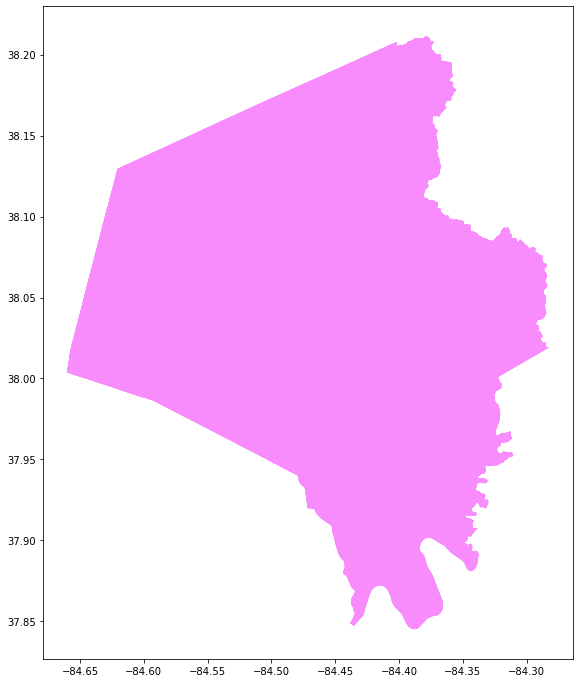

In [31]:
districtColor = '#F88CFC'

fig, ax = plt.subplots()

title = "Districts Merged 1972 - 2012"

district_merge3.plot(ax=ax, color=districtColor, linewidth=.1, zorder=0)

In [32]:
district3 = district_merge3[district_merge3['DISTRICT'] == 3]

In [33]:
district3.head()

,OBJECTID,AREA,PERIMETER,DIST1972_,DIST1972_I,DISTRICT,REP,Shape__Are,Shape__Len,geometry,year,DIST1982_,DIST1982_I,URL,TELEPHONE,EMAIL,DIST1992_,DIST1992_I,DIST2002_,DIST2002_I,created_da,last_edite,created_by,last_edi_1
5,6,7.522693e+07,47308.311336,7.0,0.0,3,None,7.522693e+07,47308.311021,"POLYGON ((-84.51811 38.06203, -84.51763 38.061...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,7.461074e+07,50792.825324,NaN,NaN,3,DICK DeCAMP,7.461073e+07,50792.824461,"POLYGON ((-84.51631 38.06095, -84.51621 38.060...",1982,7.0,6.0,http://www.lfucg.com/d3.htm,(606) 258-3200,dickd@lfucg.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,9.496719e+07,54684.493323,NaN,NaN,3,DICK DeCAMP,9.496719e+07,54684.492292,"POLYGON ((-84.51636 38.05003, -84.51623 38.050...",1992,NaN,NaN,http://www.lfucg.com/d3.htm,(606) 258-3200,dickd@lfucg.com,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
5,6,9.554172e+07,60578.500564,NaN,NaN,3,DICK DeCAMP,9.554173e+07,60578.501888,"POLYGON ((-84.49785 38.05130, -84.49727 38.050...",2002,NaN,NaN,http://www.lfucg.com/Council/District03.asp,(859) 258-3200,dickd@lfucg.com,NaN,NaN,7.0,6.0,NaN,NaN,NaN,NaN
2,474,NaN,NaN,NaN,NaN,3,HANNAH LEGRIS,1.134341e+08,67247.809381,"POLYGON ((-84.49785 38.05132, -84.49727 38.050...",2012,NaN,NaN,https://www.lexingtonky.gov/council-district-3,(859) 280-8240,hlegris@lexingtonky.gov,NaN,NaN,NaN,NaN,2021-01-18,2021-01-18,gis_lfucg,gis_lfucg


<AxesSubplot:>

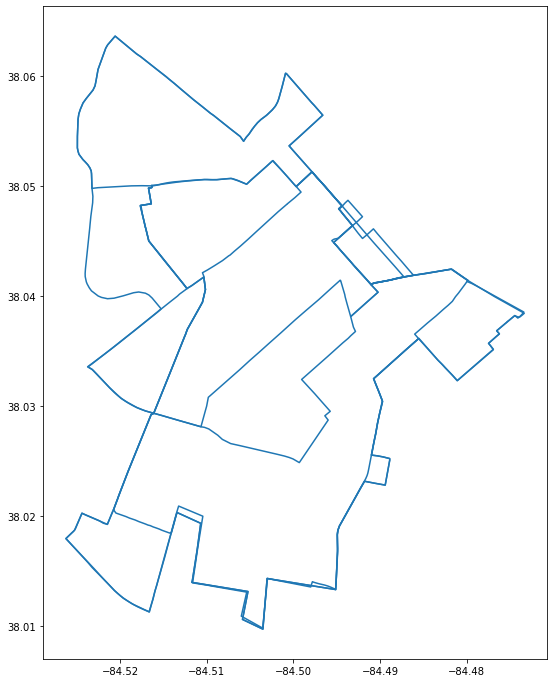

In [34]:
district3.boundary.plot()

<AxesSubplot:>

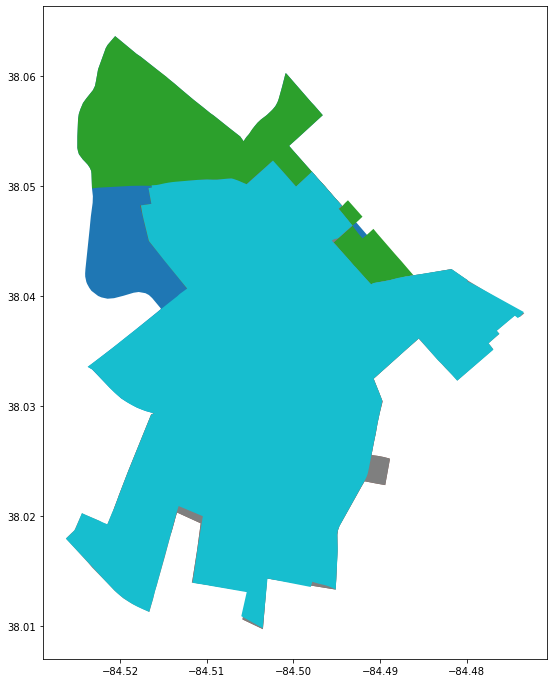

In [35]:
district3.plot(column='year')

In [36]:
district3.head()

,OBJECTID,AREA,PERIMETER,DIST1972_,DIST1972_I,DISTRICT,REP,Shape__Are,Shape__Len,geometry,year,DIST1982_,DIST1982_I,URL,TELEPHONE,EMAIL,DIST1992_,DIST1992_I,DIST2002_,DIST2002_I,created_da,last_edite,created_by,last_edi_1
5,6,7.522693e+07,47308.311336,7.0,0.0,3,None,7.522693e+07,47308.311021,"POLYGON ((-84.51811 38.06203, -84.51763 38.061...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,7.461074e+07,50792.825324,NaN,NaN,3,DICK DeCAMP,7.461073e+07,50792.824461,"POLYGON ((-84.51631 38.06095, -84.51621 38.060...",1982,7.0,6.0,http://www.lfucg.com/d3.htm,(606) 258-3200,dickd@lfucg.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,9.496719e+07,54684.493323,NaN,NaN,3,DICK DeCAMP,9.496719e+07,54684.492292,"POLYGON ((-84.51636 38.05003, -84.51623 38.050...",1992,NaN,NaN,http://www.lfucg.com/d3.htm,(606) 258-3200,dickd@lfucg.com,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
5,6,9.554172e+07,60578.500564,NaN,NaN,3,DICK DeCAMP,9.554173e+07,60578.501888,"POLYGON ((-84.49785 38.05130, -84.49727 38.050...",2002,NaN,NaN,http://www.lfucg.com/Council/District03.asp,(859) 258-3200,dickd@lfucg.com,NaN,NaN,7.0,6.0,NaN,NaN,NaN,NaN
2,474,NaN,NaN,NaN,NaN,3,HANNAH LEGRIS,1.134341e+08,67247.809381,"POLYGON ((-84.49785 38.05132, -84.49727 38.050...",2012,NaN,NaN,https://www.lexingtonky.gov/council-district-3,(859) 280-8240,hlegris@lexingtonky.gov,NaN,NaN,NaN,NaN,2021-01-18,2021-01-18,gis_lfucg,gis_lfucg


In [37]:
district3_lines = district3

In [37]:
district3.to_file('data/clean_data', driver='ESRI Shapefile')

## Chapter 1.2: District 3 Census Data 2020
 
Demographic data from 2020 Census 

In [38]:
census_2020 = gpd.read_file('data/Census_2020_-_Race_by_Precinct.zip')

In [39]:
census_2020.head()

,OBJECTID,CODE,NAME,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,P0010036,P0010037,P0010038,P0010039,P0010040,P0010041,P0010042,P0010043,P0010044,P0010045,P0010046,P0010047,P0010048,P0010049,P0010050,P0010051,P0010052,P0010053,P0010054,P0010055,P0010056,P0010057,P0010058,P0010059,P0010060,P0010061,P0010062,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,Shape__Are,Shape__Len,geometry
0,1,A101,ALEXANDRIA,807,731,552,98,18,12,0,51,76,74,12,14,8,0,23,0,0,0,7,0,0,7,0,3,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.252010e+06,10099.266885,"POLYGON ((-84.55478 38.02311, -84.55486 38.023..."
1,2,A102,BARKER,962,898,664,101,2,97,2,32,64,61,14,14,1,0,29,1,0,0,2,0,0,0,0,0,0,3,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.081397e+06,9373.794668,"POLYGON ((-84.52218 38.07133, -84.52394 38.068..."
2,3,A103,BEAUMONT,881,815,702,65,6,3,0,39,66,63,17,4,5,0,35,1,0,0,1,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.623848e+06,14131.792819,"POLYGON ((-84.55780 38.02535, -84.55787 38.025..."
3,4,A104,BELL SCHOOL HOUSE,918,801,597,11,8,9,0,176,117,114,5,17,1,0,88,0,1,0,2,0,0,0,0,0,0,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.043734e+08,144713.537342,"POLYGON ((-84.52944 38.12363, -84.52914 38.121..."
4,5,A106,CARDINAL VALLEY,1266,1069,494,216,14,4,0,341,197,191,27,26,4,1,117,4,0,0,5,0,0,5,0,2,0,6,1,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.298232e+06,13985.048291,"POLYGON ((-84.54363 38.05596, -84.54381 38.055..."


<AxesSubplot:>

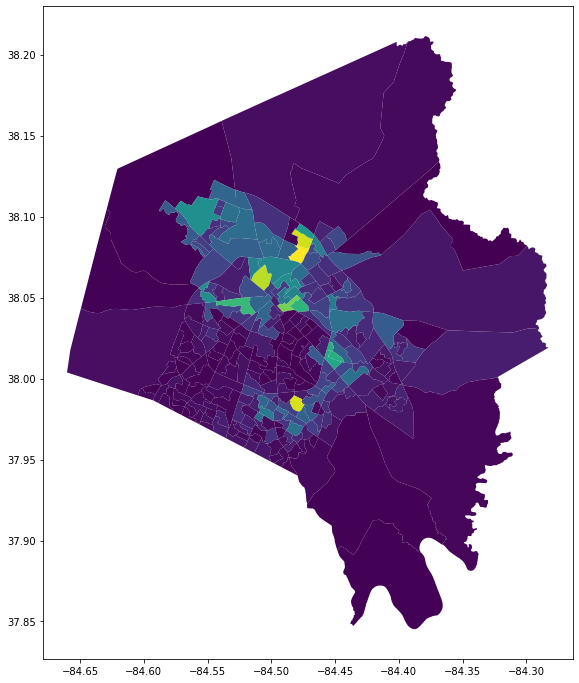

In [40]:

census_2020.plot(column='P0010004')

In [41]:
census_2020.sort_values('P0010004')

,OBJECTID,CODE,NAME,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,P0010036,P0010037,P0010038,P0010039,P0010040,P0010041,P0010042,P0010043,P0010044,P0010045,P0010046,P0010047,P0010048,P0010049,P0010050,P0010051,P0010052,P0010053,P0010054,P0010055,P0010056,P0010057,P0010058,P0010059,P0010060,P0010061,P0010062,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,Shape__Are,Shape__Len,geometry
100,101,B123,ECTON PARK,1150,1106,1073,2,1,21,0,9,44,40,5,7,8,0,19,0,0,0,0,0,0,1,0,0,0,4,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.010915e+07,13657.079761,"POLYGON ((-84.48448 38.01141, -84.48456 38.011..."
236,237,C185,N ELKHORN,364,341,296,3,2,7,0,33,23,20,7,1,1,0,10,0,0,0,0,0,0,1,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.806273e+08,137476.004237,"POLYGON ((-84.37452 38.12288, -84.37493 38.122..."
83,84,B101,CLEMENS HTS.,826,765,686,3,1,66,0,9,61,60,6,19,21,0,8,0,0,0,3,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.883334e+06,13580.764814,"POLYGON ((-84.57683 37.99411, -84.57705 37.993..."
194,195,C126,KINGSWOOD,740,698,685,3,0,3,0,7,42,41,2,7,2,0,27,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.594762e+06,7736.779344,"POLYGON ((-84.46422 38.03270, -84.46782 38.029..."
120,121,B152,EDGEWATER,877,846,830,3,1,5,0,7,31,29,0,8,13,0,6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.518677e+07,20780.303677,"POLYGON ((-84.48037 38.01346, -84.48036 38.013..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,38,A155,OHIO-WALNUT,1880,1737,645,987,15,12,1,77,143,126,38,25,14,0,30,14,0,0,4,0,0,0,0,0,1,17,13,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.845204e+06,16729.184152,"POLYGON ((-84.47830 38.04884, -84.47901 38.048..."
5,6,A109,DOUGLAS-WASHINGTON,1829,1699,377,1122,12,9,2,177,130,112,42,5,1,2,48,4,0,0,2,0,0,6,0,2,0,17,12,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.522017e+07,16407.001731,"POLYGON ((-84.50501 38.07043, -84.50480 38.070..."
29,30,A144,WINBURN,1923,1795,290,1161,7,4,3,330,128,120,40,1,1,0,62,2,0,0,11,0,0,3,0,0,0,7,5,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000791e+07,14738.244290,"POLYGON ((-84.48106 38.09201, -84.48084 38.091..."
91,92,B111,GAINESWAY,2171,2033,755,1177,7,32,3,59,138,131,67,10,21,0,17,0,2,0,14,0,0,0,0,0,0,7,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.663424e+06,10918.931664,"POLYGON ((-84.47822 37.97968, -84.47839 37.979..."


In [42]:
census_2020.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [43]:

# tranform census_2020 to NAD 83 Kentucky Single Zone
census_2020 = census_2020.to_crs('+proj=lcc +lat_1=37.08333333333334 +lat_2=38.66666666666666 +lat_0=36.33333333333334 +lon_0=-85.75 +x_0=1500000 +y_0=1000000 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs ')

In [44]:
census_2020.crs

<Bound CRS: +proj=lcc +lat_1=37.08333333333334 +lat_2=38.66666 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [45]:
councilDistrict2012.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [46]:
councilDistrict2012 = councilDistrict2012.to_crs('+proj=lcc +lat_1=37.08333333333334 +lat_2=38.66666666666666 +lat_0=36.33333333333334 +lon_0=-85.75 +x_0=1500000 +y_0=1000000 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs')

In [47]:
councilDistrict2012.crs

<Bound CRS: +proj=lcc +lat_1=37.08333333333334 +lat_2=38.66666 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [53]:
census_2020.geometry.values

<GeometryArray>
 ...
Length: 286, dtype: geometry

In [55]:
d3_mask = councilDistrict2012.unary_union

In [ ]:
precinct_name_2020 = census_2020['NAME']

In [ ]:
district_3_aa_only_2020 = census_2020['P0010004']

In [ ]:
plt.plot(precinct_name_2020, district_3_aa_only_2020, color="#444444", label="African Americans only By Precinct")

In [ ]:
# Read in 2010 census data

In [66]:
census_tract_2010 = gpd.read_file('data/Census_Tract_2010-shp.zip')

census_block_2010 = gpd.read_file('data\Census_Block_2010-shp.zip')

In [67]:
census_block_2010.head()

,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,created_by,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry
0,1,21,067,003918,1050,210670039181050,Block 1050,G5040,None,None,S,1421700,0,+38.0720590,-084.3895690,gis_lfucg,2020-12-22,gis_lfucg,2020-12-22,1.530255e+07,17763.728973,"POLYGON ((-84.40148 38.07301, -84.40081 38.073..."
1,2,21,067,003915,1003,210670039151003,Block 1003,G5040,None,None,S,198566,0,+38.0192645,-084.4001989,gis_lfucg,2020-12-22,gis_lfucg,2020-12-22,2.137317e+06,9649.960720,"POLYGON ((-84.39663 38.02107, -84.39689 38.020..."
2,3,21,067,003906,1033,210670039061033,Block 1033,G5040,None,None,S,55650,0,+38.0104566,-084.4057717,gis_lfucg,2020-12-22,gis_lfucg,2020-12-22,5.990052e+05,3158.664034,"POLYGON ((-84.40452 38.00986, -84.40656 38.008..."
3,4,21,067,003908,1007,210670039081007,Block 1007,G5040,None,None,S,6066,0,+38.0418263,-084.4441687,gis_lfucg,2020-12-22,gis_lfucg,2020-12-22,6.529860e+04,3064.567524,"POLYGON ((-84.44249 38.04168, -84.44154 38.041..."
4,5,21,067,003912,1004,210670039121004,Block 1004,G5040,None,None,S,310396,0,+38.0049783,-084.4280821,gis_lfucg,2020-12-22,gis_lfucg,2020-12-22,3.341025e+06,10783.918243,"POLYGON ((-84.42522 38.00236, -84.42676 38.003..."


In [68]:
census_tract_2010.head()

,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,created_by,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry
0,1,21,067,002500,21067002500,25,Census Tract 25,G5020,S,2115745,0,+38.0253303,-084.5218387,gis_lfucg,2020-12-22,gis_lfucg,2020-12-22,2.277323e+07,19564.128061,"POLYGON ((-84.51931 38.01850, -84.51948 38.018..."
1,2,21,067,002400,21067002400,24,Census Tract 24,G5020,S,4407441,0,+38.0138872,-084.5045036,gis_lfucg,2020-12-22,gis_lfucg,2020-12-22,4.744048e+07,29031.225874,"POLYGON ((-84.49479 38.01486, -84.49482 38.014..."
2,3,21,067,002302,21067002302,23.02,Census Tract 23.02,G5020,S,3315829,74,+37.9975054,-084.4837442,gis_lfucg,2020-12-22,gis_lfucg,2020-12-22,3.569163e+07,27737.213674,"POLYGON ((-84.47181 37.99281, -84.47194 37.992..."
3,4,21,067,002200,21067002200,22,Census Tract 22,G5020,S,1099266,0,+38.0695855,-084.5223829,gis_lfucg,2020-12-22,gis_lfucg,2020-12-22,1.183202e+07,15071.987765,"POLYGON ((-84.51675 38.06453, -84.51618 38.060..."
4,5,21,067,001900,21067001900,19,Census Tract 19,G5020,S,2300749,0,+38.0423883,-084.5299519,gis_lfucg,2020-12-22,gis_lfucg,2020-12-22,2.476444e+07,23106.701996,"POLYGON ((-84.53811 38.04817, -84.53674 38.048..."


<AxesSubplot:>

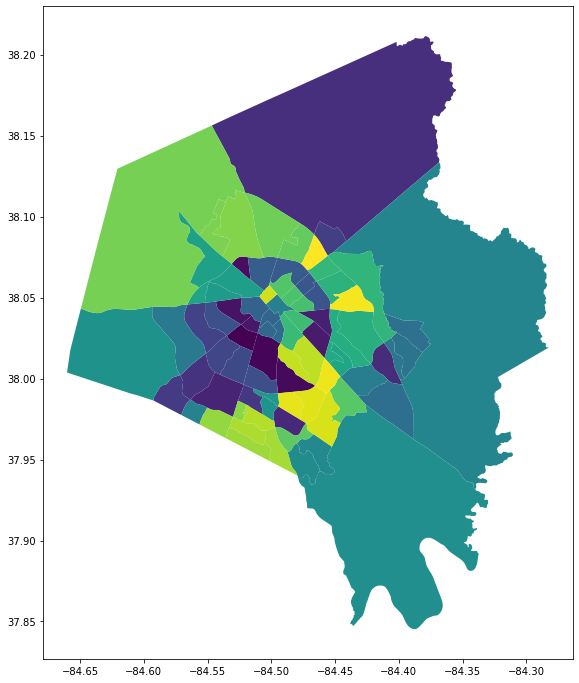

In [69]:
census_tract_2010.plot(column='OBJECTID')

## Chapter 1.3 Historic District 10 

In [ ]:
# Creating District 10 selected historic district boundaries

In [38]:
# Assign District 10 to field value
district10 = district_merge3[district_merge3['DISTRICT'] == 10]

In [39]:
district10.head()

,OBJECTID,AREA,PERIMETER,DIST1972_,DIST1972_I,DISTRICT,REP,Shape__Are,Shape__Len,geometry,year,DIST1982_,DIST1982_I,URL,TELEPHONE,EMAIL,DIST1992_,DIST1992_I,DIST2002_,DIST2002_I,created_da,last_edite,created_by,last_edi_1
7,8,8.831988e+07,49863.304053,9.0,0.0,10,None,8.831988e+07,49863.303974,"POLYGON ((-84.55211 38.04677, -84.55192 38.046...",1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,1.230123e+08,57795.831829,NaN,NaN,10,SANDY SHAFER,1.230123e+08,57795.832617,"POLYGON ((-84.56718 38.03523, -84.56739 38.035...",1982,9.0,7.0,http://www.lfucg.com/d10.htm,(606) 258-3200,sandys@lfucg.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,1.956126e+08,84427.649569,NaN,NaN,10,SANDY SHAFER,1.956126e+08,84427.650399,"POLYGON ((-84.51919 38.02386, -84.52018 38.021...",1992,NaN,NaN,http://www.lfucg.com/d10.htm,(606) 258-3200,sandys@lfucg.com,8.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
7,8,1.920664e+08,98960.197025,NaN,NaN,10,SANDY SHAFER,1.920664e+08,98960.196952,"POLYGON ((-84.56795 38.03703, -84.56757 38.037...",2002,NaN,NaN,http://www.lfucg.com/Council/District10.asp,(859) 258-3200,sandys@lfucg.com,NaN,NaN,9.0,8.0,NaN,NaN,NaN,NaN
8,480,NaN,NaN,NaN,NaN,10,AMANDA MAYS BLEDSOE,1.921365e+08,97890.431007,"POLYGON ((-84.55513 38.02326, -84.55486 38.023...",2012,NaN,NaN,https://www.lexingtonky.gov/council-district-10,(859) 280-8247,abledsoe@lexingtonky.gov,NaN,NaN,NaN,NaN,2021-01-18,2021-01-18,gis_lfucg,gis_lfucg


<AxesSubplot:>

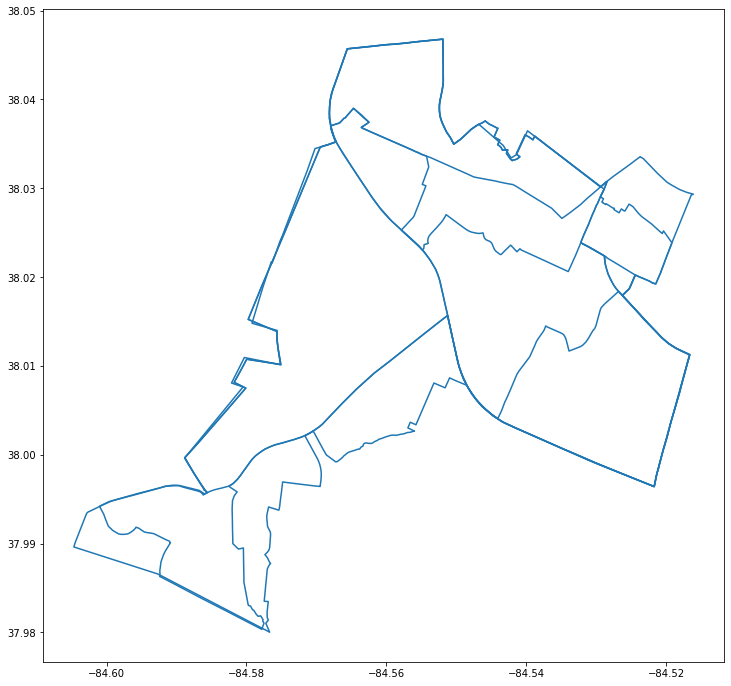

In [43]:
district10.boundary.plot()

<AxesSubplot:>

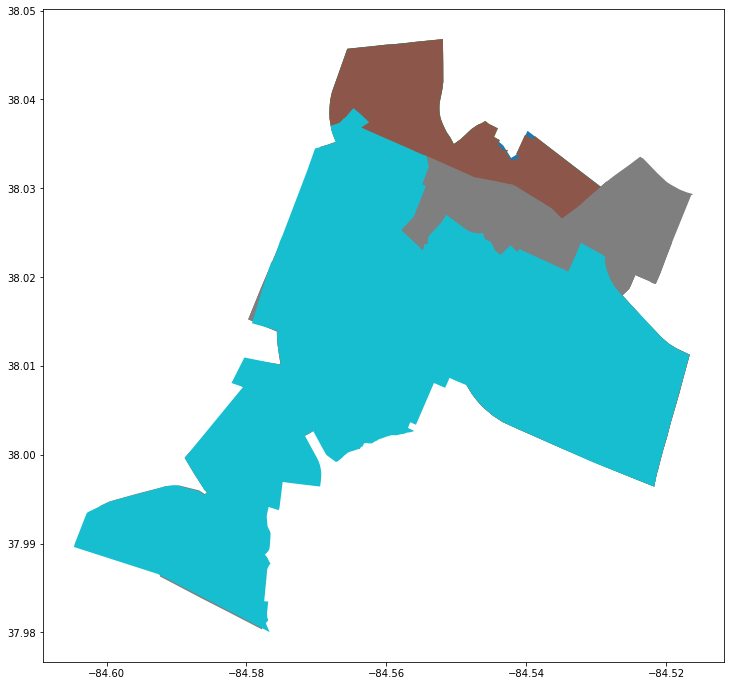

In [44]:
district10.plot(column='year')

In [45]:
district10.to_file('data/clean_data/district10_historic_boundaries)')